# PyROOTで色々やってみる

In [1]:
import numpy as np
import ROOT as r

Welcome to JupyROOT 6.28/00


## ヒストグラム

Info in <TCanvas::Print>: pdf file ./images/hist_gauss_10000.pdf has been created


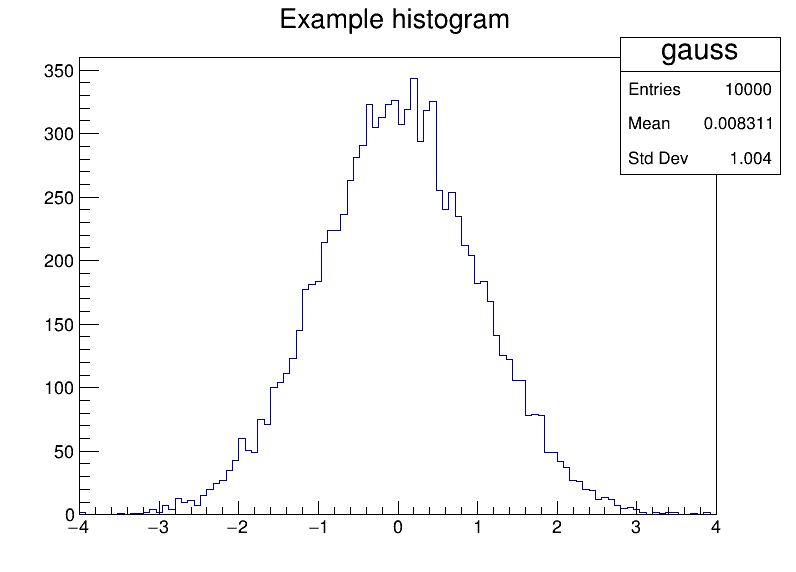

In [76]:
# r.enableJSVis() # Canvasにインタラクトできるようになる
r.disableJSVis()

h = r.TH1F(
    "gauss", # 名前空間上の名前
    "Example histogram", # 名前
    100, # ビン数
    -4, # 最小値
    4, # 最大値
)

h.FillRandom("gaus", 10000)

c = r.TCanvas("myCanvasName", "The Canvas TFile", 800, 600)
h.Draw()
c.Draw()

c.SaveAs("./images/hist_gauss_10000.pdf")

## グラフの描画

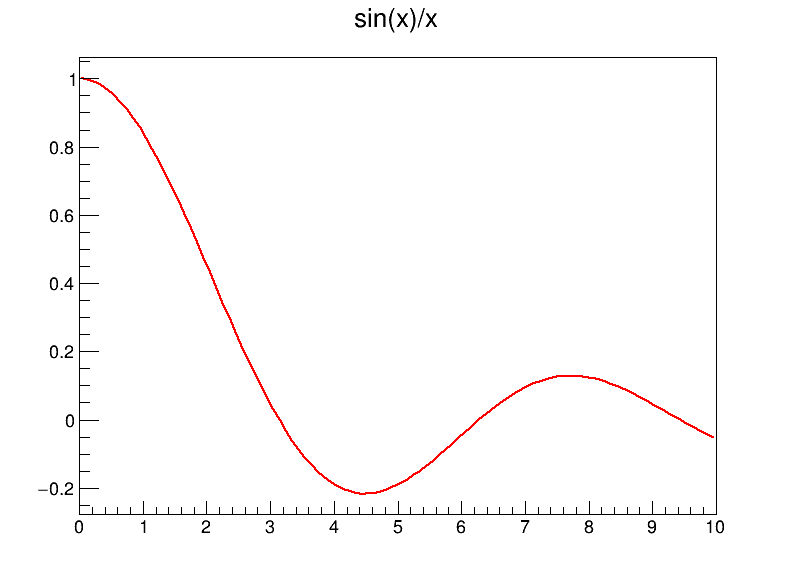

In [3]:
c2 = r.TCanvas("myCanvasName2", "The Canvas TFile 2", 800, 600)
f = r.TF1("f1", "sin(x)/x", 0., 10.)
f.Draw()
c2.Draw()

## TGraphErrors

 FCN=5.49514 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=1.81732e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.39029e+00   5.64052e-01   3.82061e-04   5.22651e-04
   2  p1           1.92244e+00   4.91069e-02   3.32618e-05   1.68701e-02


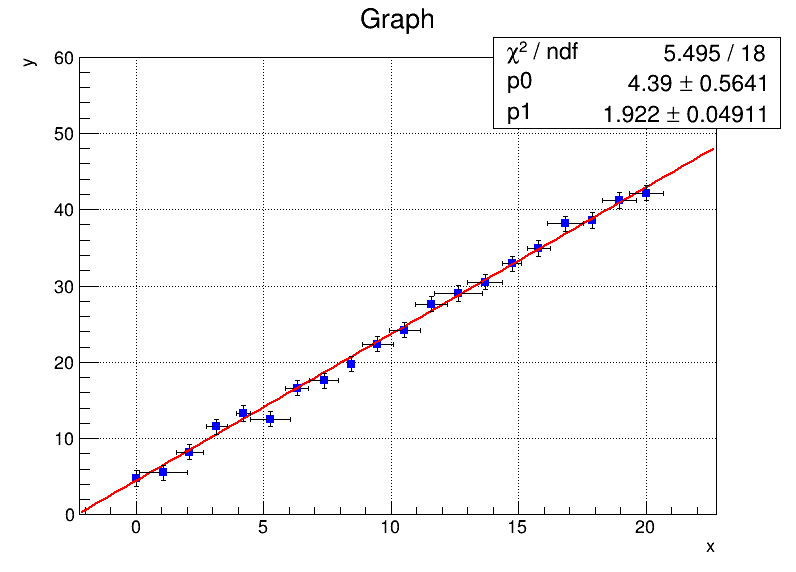

In [2]:
r.disableJSVis() # Canvasにインタラクトできるようになる

# r.GROOT.Reset()
r.gStyle.SetOptFit()

np.random.seed(0)

n = 20
x = np.linspace(0, n, n)
y = 2.0 * x + 3.0 + np.random.randn(n)

ex = np.random.rand(n)

# print(ex)

ey = np.full(n, 1.0)

# print(ey)

c1 = r.TCanvas("c1","A Simple Graph with error bars", 800, 600)
c1.SetGrid()

# gr = r.TGraph(
#     n,
#     x, y,
# )



gr = r.TGraphErrors(
    n,
    x, y,
    ex, ey,
    )
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)

gr.GetXaxis().SetTitle("x")
gr.GetYaxis().SetTitle("y")
gr.GetYaxis().SetRangeUser(0,60)

# 任意の関数のフィッティングの場合
# f1 = r.TF1(
#     "f1", # name
#     "[0]*x+[1]", # function
#     0, # x_min
#     n # x_max
# )

# f1.SetParameter(0, 1) # パラメータの初期値の設定(引数, 初期値)
# f1.SetParameter(1, 1) # パラメータの初期値の設定(引数, 初期値)
# f1.SetParameters(1, 1) # こう書いても良い

gr.Fit("pol1")

gr.Draw("AP")

# led = r.TLegend(size, "")


c1.Draw()

## ガウスフィッティング

 FCN=26.2828 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=2.3776e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.96751e+02   9.84384e+00   2.03549e-02  -7.41662e-05
   2  Mean         9.64643e-03   1.00330e-02   2.55857e-05  -1.80683e-02
   3  Sigma        9.99260e-01   7.27085e-03   5.01687e-06  -3.02339e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: myhist (Potential memory leak).


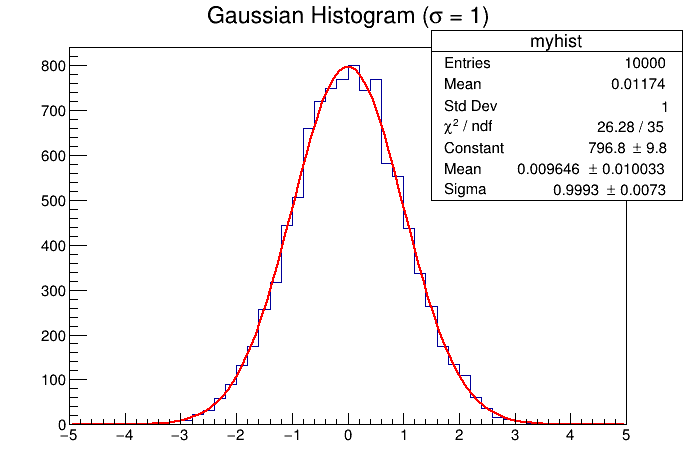

In [70]:
c1 = r.TCanvas("c1","A Simple Graph with error bars",200,10,700,500)
# c1.SetGrid()

hist = r.TH1D(
    "myhist",
    "Gaussian Histogram (#sigma = 1)",
    50,
    -5,
    5,
)

hist.FillRandom("gaus", 10000)

hist.Fit("gaus")

hist.Draw()
c1.Draw()

## TEfficiency

In [75]:
def efficiency_fit_show(bPassed, x, filename, nbin=100, bin_min=0, bin_max=100):
    c1 = r.TCanvas("c1","c1",0,0,800,600)
    c1.DrawFrame(0., 0., 100, 1.5, ";Truth p_{T}[GeV];accuracy;#epsilon")
    c1.SetGrid()

    f1 = r.TF1("f1", "[0]/(exp(-(x-[1])/[2])+1)", 0, 100)
    f1.SetParameters(1,10,1)
    f1.SetParNames("Plateu_accuracy", "Rising_point", "Rising_shape")

    r.gStyle.SetOptFit() # 統計情報を表示

    pEff = r.TEfficiency("eff", ";Truth p_{T}[GeV];accuracy;#epsilon",nbin,bin_min,bin_max)

    for i in range(len(x)):
        pEff.Fill(bPassed[i], x[i])



    pEff.Fit(f1)
    pEff.Draw("same")

    LabelATLAS = "#scale[.9]{#font[72]{ATLAS} #font[42]{Simulation Internal}}"
    LabelNofMuon = "#scale[.9]{#font[42]{N of muon = 0, 1, 2, 3, 4 (discrete uniform)}}"
    LabelPileup = "#scale[.9]{#font[42]{<#mu> = 0, 80, 140, 200 (discrete uniform)}}"
    LabelEta = "#scale[.9]{#font[42]{1.0 < #eta < 2.4}}"
    LabelPT = "#scale[.9]{#font[42]{0 < p_{T} [GeV] < 100 (uniform)}}"

    Labels = [LabelATLAS, LabelNofMuon, LabelPileup, LabelEta, LabelPT]
    LabelPosX = 0.30
    LabelPosY= 0.50


    

    text = r.TLatex()
    text.SetNDC()

    for i, Label in enumerate(Labels):
        text.DrawLatex(LabelPosX, LabelPosY-0.07*i, Label)

    text.DrawLatex(0.15, 0.8, "#scale[1.5]{#font[42]{Tutorial for PyROOT}}")

    c1.Draw()

    c1.SaveAs(f"./images/{filename}.pdf")
    c1.SaveAs(f"./images/{filename}.png")


N = 10000
x = np.random.rand(N)
bPassed = np.random.rand(N) < (np.tanh((x*25-3)/2) + 1)/2 * 0.95
xx = x*100

efficiency_fit_show(bPassed, xx, filename="TEff", nbin=50)

/tmp/ipykernel_15982/1788362957.py:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  pEff.Fill(bPassed[i], x[i])
Info in <TBinomialEfficiencyFitter::result>:  chi2 44.301934 ndf 0 
Info in <TCanvas::Print>: pdf file ./images/TEff.pdf has been created
Info in <TCanvas::Print>: png file ./images/TEff.png has been created


In [36]:
# data = np.loadtxt("../data/scatter.csv", delimiter=",") # なぜこれができないのか

import pandas as pd
data = pd.read_csv("../data/scatter.csv", header=None).to_numpy()

20

 FCN=0.0553663 FROM MIGRAD    STATUS=CONVERGED      24 CALLS          25 TOTAL
                     EDM=1.52175e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.63719e+00   1.97219e+00   5.99437e-04  -7.39787e-05
   2  p1           2.98057e+00   2.15384e-01   6.54649e-05  -3.06716e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


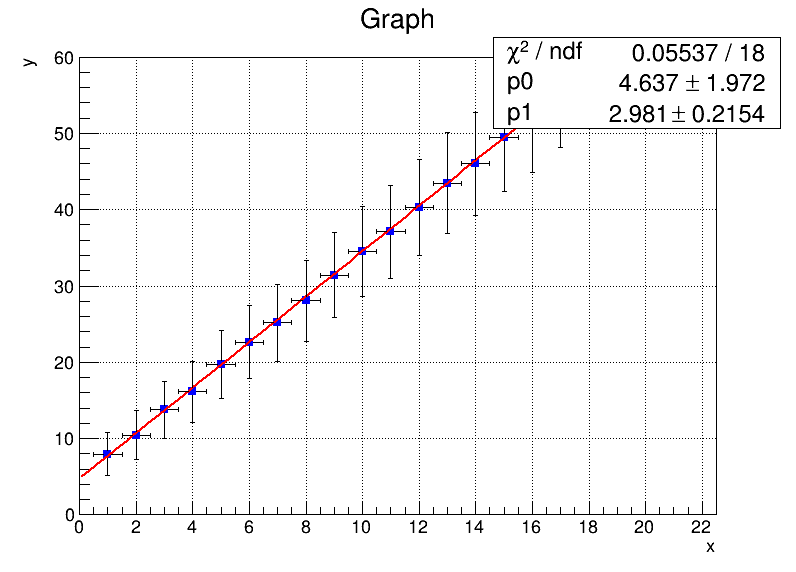

In [43]:
c1 = r.TCanvas("c1","A Simple Graph with error bars", 800, 600)
c1.SetGrid()

ex = np.array([0.5]*len(data))
ey = np.sqrt(data[:,1])

gr = r.TGraphErrors(
    len(data),
    data[:,0], data[:,1],
    ex, ey,
)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)

gr.GetXaxis().SetTitle("x")
gr.GetYaxis().SetTitle("y")
gr.GetYaxis().SetRangeUser(0,60)

# 任意の関数のフィッティングの場合
# f1 = r.TF1(
#     "f1", # name
#     "[0]*x+[1]", # function
#     0, # x_min
#     n # x_max
# )

# f1.SetParameter(0, 1) # パラメータの初期値の設定(引数, 初期値)
# f1.SetParameter(1, 1) # パラメータの初期値の設定(引数, 初期値)
# f1.SetParameters(1, 1) # こう書いても良い

gr.Fit("pol1")

gr.Draw("AP")

c1.Draw()